### Ques 1.
Check the trend of investments over the years. To check the trend, find the total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.

Note : There is some error in the 'Date' feature. Make sure to handle that.

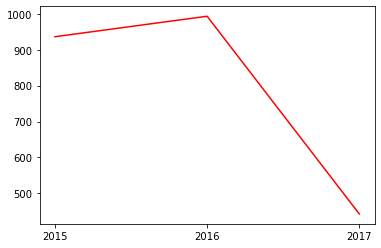

2015 936
2016 993
2017 443


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

file=open('startup_funding.csv')
data=csv.DictReader(file,skipinitialspace=True)
year=[]
dic={}
for row in data:
    year.append(row['Date'][len(row['Date'])-4:])
year=np.array(year,dtype=int)
for i in year:
    if i in dic:
        dic[i]=dic[i]+1
    else:
        dic[i]=1
x=[]
y=[]
for i in dic:
    x.append(i)
    y.append(dic[i])
x=x[::-1]
y=y[::-1]
plt.plot(x,y,'r')
plt.xticks(x)
plt.show()
for i in range(len(y)):
    print(x[i],y[i])

### Ques 2.
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ? Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. 

Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


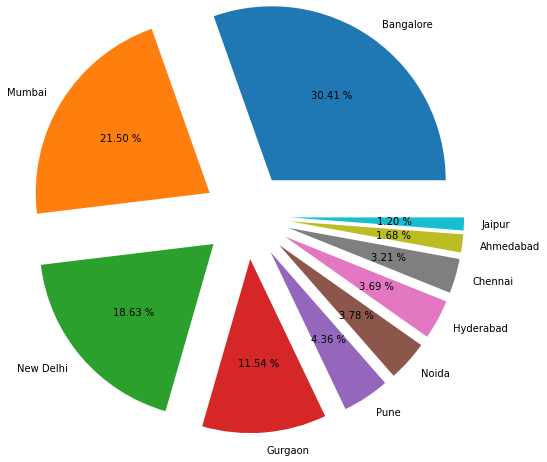

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import csv

file=open('startup_funding.csv')
data=csv.DictReader(file,skipinitialspace=True)
city=[] 
for row in data:
    city.append(row['CityLocation'])
city=np.array(city)
city=city[city!='']
for row in range(len(city)):
    if city[row]=='Delhi':
        city[row]='New Delhi'
    if city[row]=='bangalore':
        city[row]='Bangalore'
for row in range(len(city)):
    city[row]=city[row].split('/')[0].strip()
dic=dict()
for row in city:
    dic[row]=dic.get(row,0)+1 #inserting element in dictionary
x=[]
y=[]
for i in dic:
    x.append(i)
    y.append(dic[i])
x=np.array(x)
y=np.array(y)
x=x[np.argsort(y)]
y=np.sort(y)

x=x[len(x)-1:len(x)-1-10:-1]
y=y[len(y)-1:len(y)-1-10:-1]
for i in range(len(y)):
    print(x[i],y[i])
    
plt.pie(y,radius=2,labels=x,explode=[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],autopct="%.2f %%")
plt.show()

### Ques 3
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received.
Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.

Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those 
startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


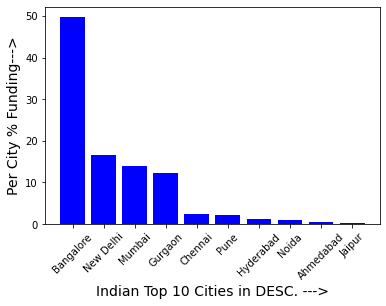

In [44]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df['CityLocation'].dropna(inplace=True)
df['CityLocation']=df['CityLocation'].str.split('/',expand=True)[0].str.strip()
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'].replace('bangalore','Bangalore',inplace=True)
df['AmountInUSD']=df['AmountInUSD'].apply(lambda x:float(str(x).replace(',','')))
df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'])
city_amount=df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amount=city_amount.values
percity=np.true_divide(amount,amount.sum())*100
for i in range(len(percity)):
    print(city[i],format(percity[i],'.2f'))
plt.bar(city,percity,color='blue')
plt.ylabel('Per City % Funding--->',size=14)
plt.xlabel('Indian Top 10 Cities in DESC. --->',size=14)
plt.xticks(rotation=45)
plt.show()

### Ques 4
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a Scatter chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

NOTE:
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data =pd.read_csv('startup_funding.csv')
df=data.copy()
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Debtfunding','Debt Funding',inplace=True)
df['InvestmentType'].replace('CrowdFunding','Crowd Funding',inplace=True)
df['AmountInUSD'].fillna('0',inplace=True)
df['AmountInUSD']=df['AmountInUSD'].apply(lambda x:float(str(x).replace(',','')))
df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'])

np_seed_funding=np.array(df.AmountInUSD[df.InvestmentType=='Seed Funding'])
for i in range(len(np_seed_funding)):
    np_seed_funding[i]=''.join(np_seed_funding[i].split(','))
np_seed_funding=np.array(np_seed_funding, dtype='int')
np_seed_funding



AttributeError: 'numpy.float64' object has no attribute 'split'

/home/gk-gunjan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


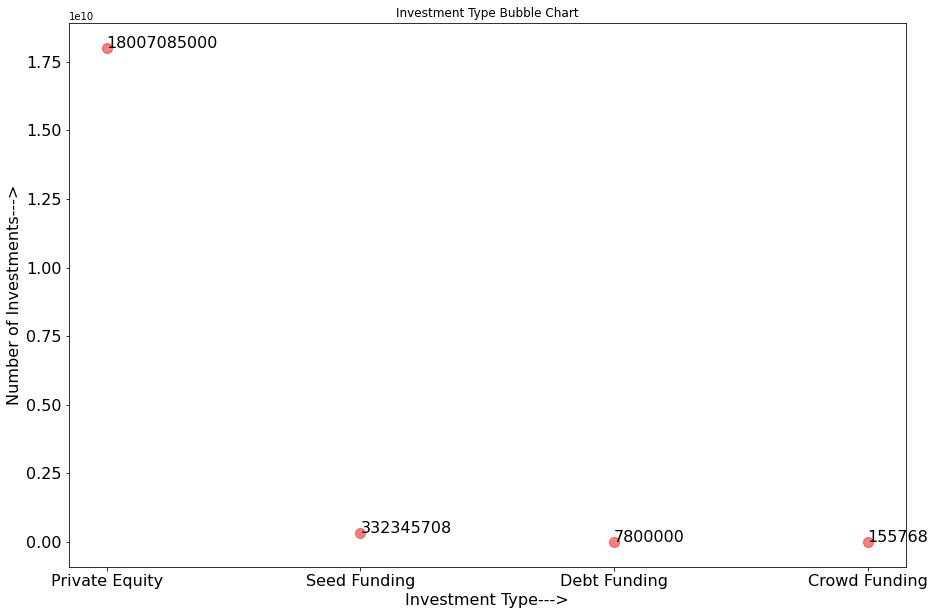

Private Equity ---> 98.14523 Percent
Seed Funding ---> 1.81141 Percent
Debt Funding ---> 0.04251 Percent
Crowd Funding ---> 0.00085 Percent


In [66]:
df=data.copy()
df.AmountInUSD.fillna('0', inplace=True)
df.InvestmentType.loc[df.InvestmentType=='Crowd funding']='Crowd Funding'
df.InvestmentType.loc[df.InvestmentType=='PrivateEquity']='Private Equity'
df.InvestmentType.loc[df.InvestmentType=='SeedFunding']='Seed Funding'


np_seed_funding=np.array(df.AmountInUSD[df.InvestmentType=='Seed Funding'])
for i in range(len(np_seed_funding)):
    np_seed_funding[i]=''.join(np_seed_funding[i].split(','))
np_seed_funding=np.array(np_seed_funding, dtype='int64')


np_Crowd_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Crowd Funding'])
for i in range(len(np_Crowd_Funding)):
    np_Crowd_Funding[i]=''.join(np_Crowd_Funding[i].split(','))
np_Crowd_Funding=np.array(np_Crowd_Funding, dtype='int64')


np_Debt_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Debt Funding'])
for i in range(len(np_Debt_Funding)):
    np_Debt_Funding[i]=''.join(np_Debt_Funding[i].split(','))
np_Debt_Funding=np.array(np_Debt_Funding, dtype='int64')


np_Private_Equity=np.array(df.AmountInUSD[df.InvestmentType=='Private Equity'])
for i in range(len(np_Private_Equity)):
    np_Private_Equity[i]=''.join(np_Private_Equity[i].split(','))
np_Private_Equity=np.array(np_Private_Equity, dtype='int64')

private=sum(np_Private_Equity)
crowd=sum(np_Crowd_Funding)
debt=sum(np_Debt_Funding)
seed=sum(np_seed_funding)
xaxis=['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
yaxis=[private, seed, debt, crowd]

plt.subplots(figsize=(15, 10))
plt.scatter(xaxis, yaxis, s=100, color='red', alpha=0.5)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('Investment Type--->', size=16)
plt.ylabel('Number of Investments--->', size=16)
plt.title('Investment Type Bubble Chart')
for i in range(len(xaxis)):
    plt.text(xaxis[i], yaxis[i], yaxis[i], size=16)
plt.show()

for i in range(len(xaxis)):
    print(xaxis[i], '--->',format((yaxis[i]*100)/sum(yaxis), '.2f'), 'Percent')